# Dimensionality Reduction: MCA & FAMD Assignment

In [3]:
import prince
import pandas as pd
import numpy as np
from sklearn import datasets

### 1. Load the digits data with Scikit-Learn

In [4]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [9]:
X = digits.data
Y = digits.target

### 2. Fit PCA to 64-components and plot the cumulative sum of the ‘pca.explained_variance_ratio_’


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_std)
X_pca = pca.transform(X_std)

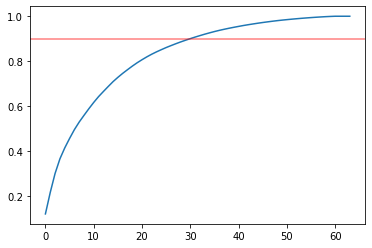

In [38]:
import matplotlib.pyplot as plt

plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
plt.axhline(.9, color='r', alpha=.5)
plt.show()

### 3. Identify the number of components required for ~90 explained variance (only for PCA).


In [33]:
cum_sum = pd.Series(np.cumsum(pca.explained_variance_ratio_))
print('number of components needed to explain over 90 percent of variance:', cum_sum.loc[cum_sum > .9].index[0] + 1)

number of components needed to explain over 90 percent of variance: 31


### 4. List the top 2 components, generate a color-coded scatter plot for the first two components.


In [55]:
X_pca_df = pd.DataFrame(X_pca)
top_two = X_pca_df.loc[:, [0,1]]
top_two['y'] = Y
top_two

,0,1,y
0,1.914214,-0.954502,0
1,0.588980,0.924636,1
2,1.302039,-0.317189,2
3,-3.020770,-0.868772,3
4,4.528949,-1.093480,4
...,...,...,...
1792,0.104331,0.255024,9
1793,2.423234,-1.429611,0
1794,1.022596,-0.147911,8
1795,1.076055,-0.380906,9


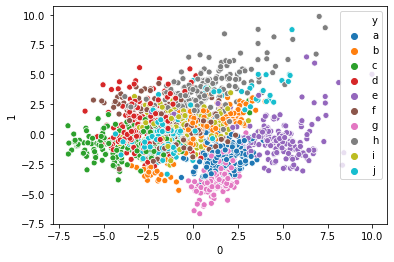

In [75]:
import seaborn as sns
alph = 'abcdefghij'
mapp = {i: a for i, a in enumerate(alph)}

sns.scatterplot(x=top_two[0], y=top_two[1], hue=top_two['y'].map(mapp))

### 5. Repeat steps 2 and 4 using Kernel-PCA with RBF, and Kernel-PCA with Poly kernels. For your kernel-PCA experiments try to identify the optimal value of gamma.


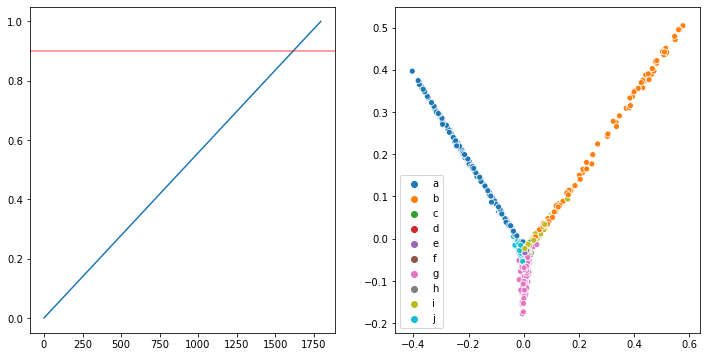

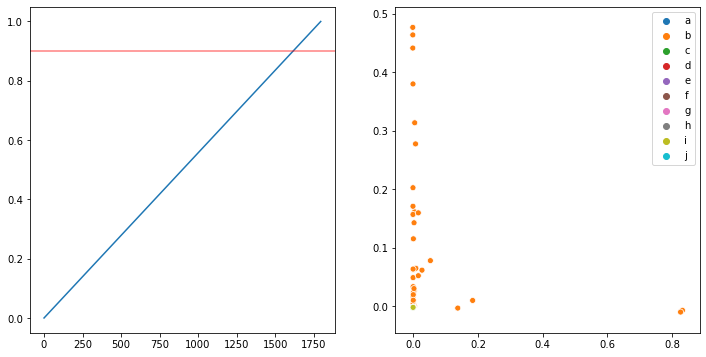

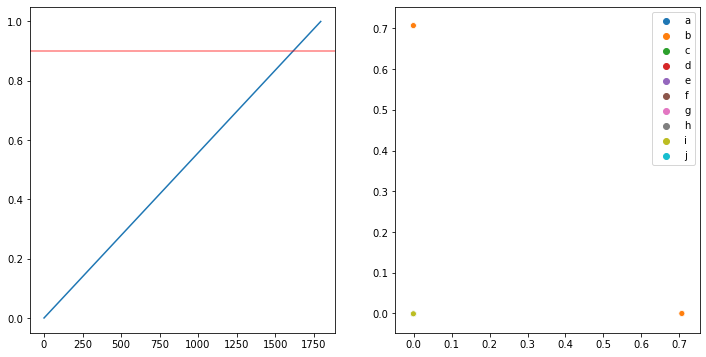

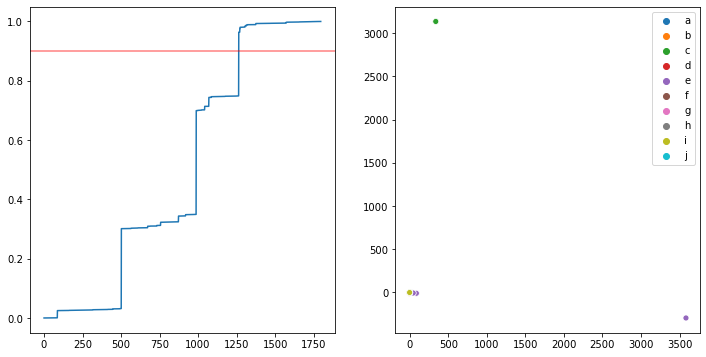

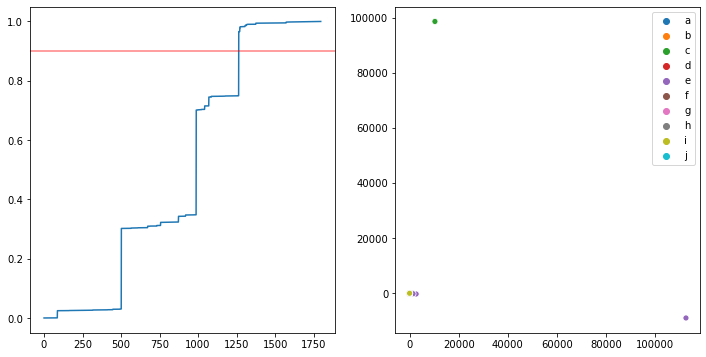

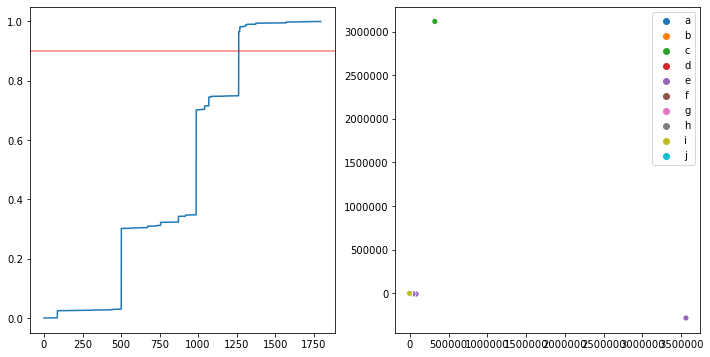

In [110]:
from sklearn.decomposition import KernelPCA

kernels = ['rbf', 'poly']
gammas = [.1,1,10]

for k in kernels:
    for g in gammas:
        kpca = KernelPCA(kernel=k, gamma=g)
        kpca.fit(X_std)
        X_kpca = kpca.transform(X_std)
        plt.figure(figsize=(12, 6))

        plt.subplot(121)
        explained_variance = np.var(X_kpca, axis=1)
        explained_variance_ratio = explained_variance/np.sum(explained_variance)
        plt.plot(range(len(explained_variance_ratio)), np.cumsum(explained_variance_ratio))
        plt.axhline(.9, color='r', alpha=.5)

        plt.subplot(122)
        sns.scatterplot(x=X_kpca[:,0], y=X_kpca[:,1], hue=pd.Series(Y).map(mapp))

In [ ]:
The best model seems to be the first one